File for work related to the organisation matched between LittleSis and bipartite-all010420

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import seaborn as sns

#### Read data

In [2]:
data = pd.read_csv(os.getcwd() + '/Data/matched_littlesis_bipartite171120.csv')
data.rename(columns = {'Unnamed: 0': 'ls_id', 'gs_match_id': 'bp_id'}, inplace = True)
data.shape

(78526, 5)

In [3]:
data.head()

,ls_id,name,bp_id,match_name,match_value
0,1,WALMART,NaN,NaN,0.000000
1,2,EXXONMOBIL,NaN,NaN,0.000000
2,3,CHEVRON,NaN,NaN,0.000000
3,4,GENERAL MOTORS COMPANY,7091108.0,COMPANY C,0.384754
4,5,CONOCOPHILLIPS,NaN,NaN,0.000000


* ls_id: LittleSis entity ID
* name: LittleSis entity name
* bp_id: bipartite-all ID of matched org
* match_name: bipartite-all name of matched org
* match_value: score of the match in range \[0, 1] 

In [4]:
ents = pd.read_pickle(os.getcwd() + '/Pickle/all_entities.pkl')
ents.shape

(284500, 13)

In [5]:
ents.head()

,summary,parent_id,extensions,website,name,primary_ext,aliases,blurb,types,updated_at,id,start_date,end_date
1,None,NaN,"{'Org': {'name_nick': 'WAL-MART', 'name': 'Wal...",www.corporate.walmart.com,Walmart,Org,"[IRS EIN 71-0415188, Wal Mart, Wal-Mart, Wal-M...",Retail merchandising,"[Organization, Business, Public Company]",2020-06-30T20:47:43Z,1,None,None
2,None,NaN,"{'Org': {'name_nick': 'EXXONMOBIL', 'name': 'E...",http://www.exxonmobil.com,ExxonMobil,Org,"[Exxon Corporation, Exxon Mobil, Exxon Mobil C...","Oil and gas exploration, production, and marke...","[Organization, Business, Public Company]",2020-07-14T02:29:21Z,2,1882-00-00,None
3,None,NaN,"{'Org': {'name_nick': 'CHEVRON', 'name': 'Chev...",www.chevron.com,Chevron,Org,"[Chevron, Chevron Corporation, ChevronTexaco, ...",Energy Company,"[Organization, Business, Public Company]",2020-07-14T02:27:36Z,3,None,None
4,None,NaN,"{'Org': {'name_nick': 'GEN-MOTOR', 'name': 'Ge...",www.gm.com,General Motors Company,Org,"[General Motors, General Motors Company, Gener...",automobile manufacturer,"[Organization, Business, Public Company]",2020-06-16T01:28:05Z,4,1908-00-00,2011-03-31
5,None,NaN,"{'Org': {'name_nick': 'CONOCOPHIL', 'name': 'C...",http://www.conocophillips.com/,ConocoPhillips,Org,"[Conoco Inc., ConocoPhillips, ConocoPhillips H...",Texas-based oil and gas corporation,"[Organization, Business, Public Company]",2020-06-11T14:26:07Z,5,None,None


In [6]:
rels = pd.read_pickle(os.getcwd() + '/Pickle/all_rels.pkl')
rels.shape

(1230815, 15)

In [7]:
rels.head()

,category_id,description2,id,description,entity1_id,is_current,updated_at,entity2_id,currency,start_date,amount,goods,description1,end_date,filings
1,1,Director,1,Allen I Questrom had a position (Director) at...,1006,False,2011-03-13T20:15:59Z,1,None,2007-00-00,NaN,None,Director,2010-06-00,NaN
2,1,Director,2,Linda S Wolf has a position (Director) at Wa...,1007,True,2008-11-05T17:05:10Z,1,None,2005-00-00,NaN,None,Director,None,NaN
3,1,Director,3,Aida M Alvarez had a position (Director) at ...,1008,False,2018-04-23T14:25:16Z,1,None,None,NaN,None,Director,2015-00-00,NaN
4,1,Chairman,4,Gregory Boyd Penner has/had a position (Vice ...,1009,None,2018-04-23T14:54:35Z,1,None,None,NaN,None,Vice Chairman,None,NaN
6,1,Director,6,Christopher J Williams had a position (Direct...,1011,False,2015-03-31T14:56:50Z,1,None,2004-00-00,NaN,None,Director,None,NaN


In [8]:
bipartite_all = nx.read_gpickle(os.getcwd() + '/Pickle/bipartite-all010420.pickle')
bipartite_all.number_of_nodes()

4054832

In [9]:
bipartite_all.nodes[7091108]

{'degree': 7,
 'assets_total': 33697.0,
 'revenue_investments': '0.0',
 'rev_govt_grants': 0.0,
 'naics_code': '711120',
 'year_founded': nan,
 'address_line_1': 'P.O. Box 23262',
 'num_employees': 1.0,
 'city': 'Pleasant Hill',
 'expenses_total': 207670.0,
 'total_revenue': 210114.0,
 'sic_code': '7922',
 'deductibility_code': '1',
 'zip': '94523',
 'ntee_code': 'A63',
 'bipartite': 0,
 'state': 'CA',
 'Uppername': 'COMPANY C',
 'num_volunteers': nan,
 'ein': '22-3865899',
 'revenue_contributions': 174533.0,
 'employees_over_100k': 0.0}

Summary plots:

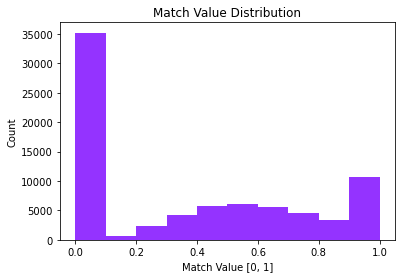

In [10]:
plt.hist(data['match_value'], color = '#9433ff')
# plt.yscale('log')
plt.title('Match Value Distribution')
plt.xlabel('Match Value [0, 1]')
plt.ylabel('Count')
plt.show()
plt.close()

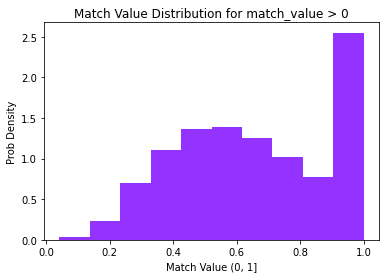

In [11]:
plt.hist(data[data['match_value'] > 0]['match_value'], density = True, color = '#9433ff')
plt.title('Match Value Distribution for match_value > 0')
plt.xlabel('Match Value (0, 1]')
plt.ylabel('Prob Density')
plt.show()
plt.close()

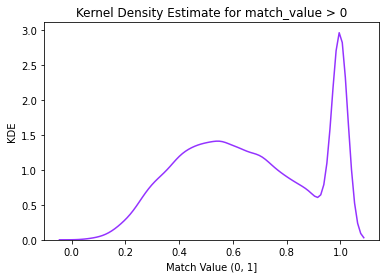

In [12]:
sns.distplot(data[data['match_value'] > 0]['match_value'], kde = True, hist = False, color = '#9433ff')
plt.title('Kernel Density Estimate for match_value > 0')
plt.xlabel('Match Value (0, 1]')
plt.ylabel('KDE')
plt.show()
plt.close()

Drop rows where match_value == 0 i.e. match_name is NaN:

In [13]:
data = data[data['match_value'] > 0]
data['bp_id'] = data['bp_id'].apply(lambda x: None if np.isnan(x) else int(x))  # convert bp_id from float to int
print(data.shape)
data.head()

(43358, 5)


,ls_id,name,bp_id,match_name,match_value
3,4,GENERAL MOTORS COMPANY,7091108,COMPANY C,0.384754
8,9,BANK OF AMERICA CORPORATION,8294825,HOUSING CORPORATION OF AMERICA,0.580073
10,11,BERKSHIRE HATHAWAY INC,6823250,BERKSHIRE FUND INC,0.556410
11,12,JPMORGAN CHASE & CO,6930339,TIFFANY & CO FOUNDATION,0.174680
12,13,AMERICAN INTERNATIONAL GROUP INC,7798912,AMERICAN MEDICAL GROUP ASSOCIATION INC,0.645161


In [14]:
data['match_value'].describe()

count    43358.000000
mean         0.661962
std          0.245385
min          0.041470
25%          0.463763
50%          0.644872
75%          0.896434
max          1.000000
Name: match_value, dtype: float64

Left join with LittleSis entity data:

In [15]:
data = data.join(ents.rename(columns = {'id': 'ls_id'}).set_index('ls_id'), on = 'ls_id', lsuffix = '_left', rsuffix = '_right')
data.head()

,ls_id,name_left,bp_id,match_name,match_value,summary,parent_id,extensions,website,name_right,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
3,4,GENERAL MOTORS COMPANY,7091108,COMPANY C,0.384754,None,NaN,"{'Org': {'name_nick': 'GEN-MOTOR', 'name': 'Ge...",www.gm.com,General Motors Company,Org,"[General Motors, General Motors Company, Gener...",automobile manufacturer,"[Organization, Business, Public Company]",2020-06-16T01:28:05Z,1908-00-00,2011-03-31
8,9,BANK OF AMERICA CORPORATION,8294825,HOUSING CORPORATION OF AMERICA,0.580073,None,NaN,"{'Org': {'name_nick': 'BOA', 'name': 'Bank of ...",www.bankofamerica.com,Bank of America Corporation,Org,"[Bank of America, Bank of America Corp, Bank o...",The largest bank holding company in the United...,"[Organization, Business, Public Company]",2020-07-05T01:53:00Z,None,None
10,11,BERKSHIRE HATHAWAY INC,6823250,BERKSHIRE FUND INC,0.556410,None,NaN,"{'Org': {'name_nick': 'BERKSHIRE', 'name': 'Be...",www.berkshirehathaway.com,Berkshire Hathaway Inc.,Org,"[Berkshire Hathaway, Berkshire Hathaway Inc.]","Holding company headquartered in Omaha, Nebraska","[Organization, Business, Public Company]",2020-05-28T20:55:40Z,None,None
11,12,JPMORGAN CHASE & CO,6930339,TIFFANY & CO FOUNDATION,0.174680,None,NaN,"{'Org': {'name_nick': 'JPMORGAN2', 'name': 'JP...",www.jpmorganchase.com,JPMorgan Chase & Co.,Org,"[BHC ID 1039502, Chase Manhattan Corporation, ...",A multinational banking corporation | World's ...,"[Organization, Business, Public Company]",2020-07-09T16:27:38Z,1968-00-00,None
12,13,AMERICAN INTERNATIONAL GROUP INC,7798912,AMERICAN MEDICAL GROUP ASSOCIATION INC,0.645161,None,NaN,"{'Org': {'name_nick': 'AM-INT_GRP', 'name': 'A...",www.aig.com,"American International Group, Inc.",Org,"[AIG, American International Group, American I...",Global insurance company,"[Organization, Business, Public Company]",2020-07-05T23:54:57Z,1919-00-00,None


Keep rows of types we're interested in:

In [16]:
def filterByType(df):  # returns indices of rows that satisfy the filter by 'type' criterion
    reqd_types = ['Philanthropy', 'Other Not-for-Profit', 'Academic Research Institute', 'School', 'Cultural/Arts', 'Policy/Think Tank']  # 'Academic' has been removed
    
    df_exploded = df.explode('types')
    
    reqd_ls_id = df_exploded[df_exploded['types'].isin(reqd_types)]['ls_id'].unique()
    
    return df[df['ls_id'].isin(reqd_ls_id)]

In [17]:
filtered_data = filterByType(data)
filtered_data = filtered_data.drop(columns = ['name_right']).rename(columns = {'name_left': 'name'})
print(filtered_data.shape)
filtered_data.head()

(7454, 16)


,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
1236,14713,HARVARD LAW SCHOOL,6822486,HARVARD LAW REVIEW ASSOCIATION,0.705592,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,None,None
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None
1284,14922,UNIVERSITY OF NEBRASKA LINCOLN,8904282,UNIVERSITY PROGRAM COUNCIL UNIVERSITY OF NEBRA...,0.844771,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,None,None
1285,14924,COLUMBIA UNIVERSITY,7871420,COLUMBIA INTERNATIONAL UNIVERSITY,0.909055,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,1754-00-00,None
1286,14925,UNIVERSITY OF ILLINOIS,7513160,UNIVERSITY OF ILLINOIS FOUNDATION,0.961337,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,1867-00-00,None


Filtered data distros:

In [18]:
filtered_data.explode('types')['types'].value_counts()  # breakdown of ALL types for filtered_data

Organization                       7454
Other Not-for-Profit               2939
School                             2719
Philanthropy                       1690
Policy/Think Tank                   333
Cultural/Arts                       193
Membership Organization             147
Business                             95
Industry/Trade Association           83
Government Body                      75
Academic Research Institute          35
Media Organization                   28
Lobbying Firm                        27
Private Company                      24
Government-Sponsored Enterprise      23
Political Fundraising Committee      18
Professional Association             17
PAC                                  13
Social Club                          10
Public Relations Firm                 8
Other Campaign Committee              7
Government Advisory Body              7
Elite Consensus Group                 6
Consulting Firm                       6
Public Company                        3


In [19]:
filtered_data['match_value'].describe()

count    7454.000000
mean        0.817488
std         0.227198
min         0.049361
25%         0.663917
50%         0.944788
75%         1.000000
max         1.000000
Name: match_value, dtype: float64

In [20]:
filtered_data['match_value'].median()

0.9447883265046477

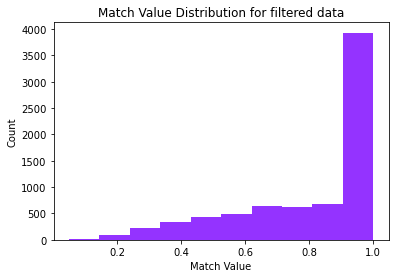

In [21]:
plt.hist(filtered_data['match_value'], density = False, color = '#9433ff')
plt.title('Match Value Distribution for filtered data')
plt.xlabel('Match Value')
plt.ylabel('Count')
# plt.ylabel('Prob Density')
plt.show()
plt.close()

Thresholding on match_value:

In [22]:
threshold = 0.7  # match_value threshold

In [23]:
filtered_data[filtered_data['match_value'] > threshold]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
1236,14713,HARVARD LAW SCHOOL,6822486,HARVARD LAW REVIEW ASSOCIATION,0.705592,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,None,None
1252,14730,HARVARD UNIVERSITY,6830462,HARVARD UNIVERSITY BAND INC,0.853769,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,1636-00-00,None
1284,14922,UNIVERSITY OF NEBRASKA LINCOLN,8904282,UNIVERSITY PROGRAM COUNCIL UNIVERSITY OF NEBRA...,0.844771,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,None,None
1285,14924,COLUMBIA UNIVERSITY,7871420,COLUMBIA INTERNATIONAL UNIVERSITY,0.909055,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,1754-00-00,None
1286,14925,UNIVERSITY OF ILLINOIS,7513160,UNIVERSITY OF ILLINOIS FOUNDATION,0.961337,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,1867-00-00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78425,380572,NIPPON FOUNDATION,6921248,NIPPON EXPRESS FOUNDATION INC,0.793950,None,NaN,"{'Org': {'name_nick': None, 'name': 'Nippon Fo...",None,Org,[Nippon Foundation],None,"[Organization, Philanthropy]",2020-07-14T02:31:22Z,None,None
78439,380598,SUNY ROCKLAND COMMUNITY COLLEGE,7073431,ROCKLAND COMMUNITY COLLEGE FOUNDATION INC,0.718448,None,NaN,"{'Org': {'name_nick': None, 'name': 'SUNY Rock...",None,Org,[SUNY Rockland Community College],a New York community college,"[Organization, School]",2020-07-14T11:57:59Z,None,None
78441,380600,FRIENDS SELECT SCHOOL,7100375,FRIENDS SELECT SCHOOL,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Friends S...",None,Org,[Friends Select School],a Philadelphia private school,"[Organization, School]",2020-07-14T12:10:05Z,None,None
78467,380699,LIVING BEYOND BREAST CANCER,7117763,LIVING BEYOND BREAST CANCER,1.000000,None,NaN,"{'Org': {'name_nick': None, 'name': 'Living Be...",None,Org,[Living Beyond Breast Cancer],provides support to those impacted by breast c...,"[Organization, Other Not-for-Profit]",2020-07-14T20:21:48Z,None,None


EIN extraction:

In [24]:
ein_present = filtered_data.explode('aliases')['aliases'].apply(lambda x: x if sum(i.isdigit() for i in x) == 9 else None).dropna().index.unique()  # get index values for rows with EIN in aliases; EIN is a 9 digit numeric value, hence sum(i.isdigit() for i in x) == 9
filtered_data.loc[ein_present].shape

(39, 16)

1. Combine with bipartite-all, check relationships

2. Relationships beyond philanthropies

3. Case studies: NEU, Rockerfeller, Bill and Melinda Gates Foundation  <-- PRIORITY

[(9726710, 'BILL & MELINDA GATES MEDICAL RESEARCH INSTITUTE'),
 (7863433, 'BILL & MELINDA GATES FOUNDATION'),
 (8330328, 'BILL & MELINDA GATES FOUNDATION TRUST')]

In [25]:
cats = pd.Series(['Position', 'Education', 'Membership', 'Family', 'Donation', 'Transaction', 'Lobbying', 'Social', 'Professional', 'Ownership', 'Hierarchy', 'Generic'], index = range(1, 13))  # LittleSis categories and IDs
cats

1         Position
2        Education
3       Membership
4           Family
5         Donation
6      Transaction
7         Lobbying
8           Social
9     Professional
10       Ownership
11       Hierarchy
12         Generic
dtype: object

#### Case Study 1: Northeastern University

In [26]:
neu_ls_id = 15367
neu_bp_id = 6819740

filtered_data[filtered_data['ls_id'] == neu_ls_id]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
1435,15367,NORTHEASTERN UNIVERSITY,6819740,NORTHEASTERN UNIVERSITY,1.0,None,NaN,"{'Org': {'name_nick': None, 'name': 'Northeast...",None,Org,[Northeastern University],None,"[Organization, School]",2020-06-15T21:58:42Z,None,None


In [27]:
neu_ls_rels = rels[rels['entity1_id'].isin([neu_ls_id]) | rels['entity2_id'].isin([neu_ls_id])]  # df of Northeastern relationships
neu_ls_rels.shape

(79, 15)

In [28]:
bipartite_all.nodes[neu_bp_id]['degree']

69

Relationship categoy breakdown:

In [29]:
pd.concat([neu_ls_rels['category_id'].value_counts(), cats], axis = 1).rename(columns = {'category_id': 'count', 0: 'category'}).sort_values(by = 'count', ascending = False).dropna()

,count,category
2,49.0,Education
1,22.0,Position
12,3.0,Generic
5,2.0,Donation
6,2.0,Transaction
11,1.0,Hierarchy


Sample of education and position relationships:

In [33]:
for i in [2, 1]:  # reqd relationship categories
    for j in neu_ls_rels[neu_ls_rels['category_id'] == i].sample(n = 10)['description']:  # taking a sample of size 10
        print(j)
    print('-' * 15)

Thomas Kreidler  is/was a student of  Northeastern University 
Beth Stevens  is/was a student of  Northeastern University 
Rebecca Rausch  is/was a student of  Northeastern University 
Rebecca Lewis  is/was a student of  Northeastern University 
Carmel Shields  is/was a student of  Northeastern University 
William F Scannell  is/was a student of  Northeastern University 
Roger B Kelley  is/was a student of  Northeastern University 
Ana Rold  is/was a student of  Northeastern University 
James Hulsizer  was a student of  Northeastern University 
Hadassah Lieberman  is/was a student of  Northeastern University 
---------------
James J Pallotta  has/had a position (Board) at  Northeastern University 
Miriam Leeser  has a position (Professor, Electrical and Computer Engineering) at  Northeastern University 
Bonnie Michelman  has/had a position (Instructor, Criminal Justice) at  Northeastern University 
Jeffrey S Bornstein  has a position (Trustee) at  Northeastern University 
Richard D'Amo

People/org breakdown from bipartite-all, and also creating df of related **people**

In [34]:
counts = {0: 0, 1: 0}  # 0: org, 1: person
related_to_neu_bp = {}

for i in bipartite_all[6819740]:
    counts[bipartite_all.nodes[i]['bipartite']] += 1
    related_to_neu_bp[i] = bipartite_all.nodes[i]['name']
    
print(counts)

related_to_neu_bp_names = pd.DataFrame(list(related_to_neu_bp.items())).rename(columns = {0: 'id', 1: 'name'})
related_to_neu_bp_names  # IDs and names of people related to NEU from bipartite-all data

{0: 0, 1: 69}


,id,name
0,946945,ANTHONY MANGANARO
1,946946,SUNDAR KUMARASAMY
2,946948,ROBERT SHILLMAN
3,582917,THOMAS NEDELL
4,946950,FRANCES N JANIS
...,...,...
64,946938,SEYMOUR STERNBERG
65,946940,MICHAEL A ARMINI
66,510314,JOSEPH AOUN
67,946942,TODD M MANGANARO


People/org breakdown from LittleSis, and also creating df of related **people**

In [35]:
related_to_neu_ls_id = neu_ls_rels[neu_ls_rels['entity1_id'] != neu_ls_id]['entity1_id'].append(neu_ls_rels[neu_ls_rels['entity2_id'] != neu_ls_id]['entity2_id']).unique()  # LittleSis IDs of all ents related to NEU
related_to_neu_ls = ents[ents['id'].isin(related_to_neu_ls_id)]  # all ents related to NEU
related_to_neu_ls['primary_ext'].value_counts()

Person    56
Org        5
Name: primary_ext, dtype: int64

In [36]:
related_to_neu_ls_names = related_to_neu_ls[related_to_neu_ls['primary_ext'] == 'Person'][['id', 'name']]  # IDs and names of people related to NEU from LittleSis data
related_to_neu_ls_names.reset_index(drop = True, inplace = True)
related_to_neu_ls_names.head()

,id,name
0,4117,Nancy J Karch
1,4710,Edward G Galante
2,4777,Roger A Cregg
3,7133,Mark A Steinkrauss
4,9618,Neal F Finnegan


Need to find matches in these dfs!

#### Case Stuy 2: Bill & Melinda Gates Foundation

In [39]:
bmgf_ls_id = 33551
bmgf_bp_id = 7863433

filtered_data[filtered_data['bp_id'] == bmgf_bp_id]

,ls_id,name,bp_id,match_name,match_value,summary,parent_id,extensions,website,primary_ext,aliases,blurb,types,updated_at,start_date,end_date
6493,33551,BILL & MELINDA GATES FOUNDATION,7863433,BILL & MELINDA GATES FOUNDATION,1.0,None,NaN,"{'Org': {'name_nick': None, 'name': 'Bill & Me...",None,Org,"[Bill & Melinda Gates Foundation, Bill and Mel...",Family foundation of Microsoft founder Bill Gates,"[Organization, Philanthropy]",2020-07-14T02:25:29Z,None,None


In [41]:
bmgf_ls_rels = rels[rels['entity1_id'].isin([bmgf_ls_id]) | rels['entity2_id'].isin([bmgf_ls_id])]  # df of B&MGF relationships
bmgf_ls_rels.shape

(420, 15)

In [42]:
bipartite_all.nodes[bmgf_bp_id]['degree']

19

Relationship category breakdown:

In [43]:
pd.concat([bmgf_ls_rels['category_id'].value_counts(), cats], axis = 1).rename(columns = {'category_id': 'count', 0: 'category'}).sort_values(by = 'count', ascending = False).dropna()

,count,category
5,304.0,Donation
1,47.0,Position
12,34.0,Generic
3,28.0,Membership
6,6.0,Transaction
11,1.0,Hierarchy


Sample of donation, position, generic, membership, and transaction relationships:

In [44]:
for i in [5, 1, 12, 3, 6]:
    for j in bmgf_ls_rels[bmgf_ls_rels['category_id'] == i].sample(n = 4)['description']:  # taking a sample of size 4
        print(j)
    print('-' * 15)

Bill & Melinda Gates Foundation  gave money to  PowerMyLearning 
Bill & Melinda Gates Foundation  gave money to  Center for Investigative Reporting 
Bill & Melinda Gates Foundation  gave money to  Digital Impact 
Bill & Melinda Gates Foundation  gave money to  Big Picture Learning 
---------------
Jeri Eckhart Queenan  had a position (Consultant to) at  Bill & Melinda Gates Foundation 
David Bley  has/had a position (Director of Northwest) at  Bill & Melinda Gates Foundation 
Margot Rogers  had a position (Deputy Director of Education and the Special Assistant to the Director of Education) at  Bill & Melinda Gates Foundation 
Ann M Fudge  had a position (Board Member) at  Bill & Melinda Gates Foundation 
---------------
Bill & Melinda Gates Foundation  and  Connecting Credentials  have/had a generic relationship
Ripple  and  Bill & Melinda Gates Foundation  have/had a generic relationship
Bill & Melinda Gates Foundation  and  Educational Results Partnership  have/had a generic relation

People/org breakdown from bipartite-all, and also creating a df of related **people**

In [45]:
counts = {0: 0, 1: 0}  # 0: org, 1: person
related_to_bmgf_bp = {}

for i in bipartite_all[bmgf_bp_id]:
    counts[bipartite_all.nodes[i]['bipartite']] += 1
    related_to_bmgf_bp[i] = bipartite_all.nodes[i]['name']
    
print(counts)

related_to_bmgf_bp_names = pd.DataFrame(list(related_to_bmgf_bp.items())).rename(columns = {0: 'id', 1: 'name'})
related_to_bmgf_bp_names  # IDs and names of people related to B&MGF from bipartite-all data

{0: 0, 1: 19}


,id,name
0,1547171,MARK SUZMAN
1,809124,WILLIAM H GATES
2,1547173,SUSAN DESMOND-HELLMANN
3,261830,TODD PIERCE
4,346951,LEIGH MORGAN
5,1789608,TREVOR MUNDEL
6,637580,ALLAN C GOLSTON
7,1789606,HELENE MADONICK
8,69019,STEVEN JOSEPH
9,516547,MELINDA FRENCH


People/org breakdown from LittleSis, and also creating df of related **people**

In [48]:
related_to_bmgf_ls_id = bmgf_ls_rels[bmgf_ls_rels['entity1_id'] != bmgf_ls_id]['entity1_id'].append(bmgf_ls_rels[bmgf_ls_rels['entity2_id'] != bmgf_ls_id]['entity2_id']).unique()  # LittleSis IDs of all ents related to B&MGF
related_to_bmgf_ls = ents[ents['id'].isin(related_to_bmgf_ls_id)]  # all ents related to B&MGF
related_to_bmgf_ls['primary_ext'].value_counts()

Org       228
Person     38
Name: primary_ext, dtype: int64

In [49]:
related_to_bmgf_ls_names = related_to_bmgf_ls[related_to_bmgf_ls['primary_ext'] == 'Person'][['id', 'name']]  # IDs and names of people related to B&MGF from LittleSis data
related_to_bmgf_ls_names.reset_index(drop = True, inplace = True)
related_to_bmgf_ls_names

,id,name
0,1116,Ann M Fudge
1,1190,Walter E Massey
2,1526,Bill Gates
3,1745,William H Gates Sr
4,2529,Henry G Cisneros
5,33550,Sylvia Mathews Burwell
6,35013,Helene D Gayle
7,44690,Rajiv Shah
8,51027,Martha Choe
9,67631,Roland Fryer
